## N210 LoRa 125 source

In [10]:
import os
import torch #, torchvision
import numpy as np
from matplotlib import pyplot
from scipy import signal
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from torch import istft
global GPU, n_fft
GPU = 1
eps = 1e-15
plt.style.use('default')
device = torch.device('cuda:1')
print('Torch version =', torch.__version__, 'CUDA version =', torch.version.cuda)
print('CUDA Device:', device)
print('Is cuda available? =',torch.cuda.is_available())

Torch version = 1.6.0 CUDA version = 10.2
CUDA Device: cuda:1
Is cuda available? = True


In [11]:
# %matplotlib notebook
# %matplotlib inline

#### Machine paths

In [12]:
path_test_1msps_lora125 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/lora125/" # ACE
path_test_1msps_click = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/click/" # ACE
path_test_1msps_mix = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/mix/" # ACE
path_test_1msps_lora250 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/lora250/" # ACE
path_test_1msps_gd55 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/gd55/" # ACE
path_test_1msps_tyt = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/tyt/" # ACE
path_test_1msps_light = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/light" # ACE
path_test_1msps_vod = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/vod/" # ACE
path_test_1msps_sado = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/sado/" # ACE
path_test_1msps_nfm = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/nfm/" # ACE
path_test_1msps_ysf = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/ysf/" # ACE
path_test_1msps_noise = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/noise/" # ACE

In [13]:
path_test_5msps_lora125 = "/home/david/sigMF_ML/RF/5msps_test_b205/lora125/" # ACE
path_test_5msps_click = "/home/david/sigMF_ML/RF/5msps_test_b205/click/" # ACE
path_test_5msps_mix = "/home/david/sigMF_ML/RF/5msps_test_b205/mix/" # ACE
path_test_5msps_lora250 = "/home/david/sigMF_ML/RF/5msps_test_b205/lora250/" # ACE
path_test_5msps_gd55 = "/home/david/sigMF_ML/RF/5msps_test_b205/GD55/" # ACE
path_test_5msps_tyt = "/home/david/sigMF_ML/RF/5msps_test_b205/TYT/" # ACE
path_test_5msps_light = "/home/david/sigMF_ML/RF/5msps_test_b205/light" # ACE
path_test_5msps_vod = "/home/david/sigMF_ML/RF/5msps_test_b205/vodeson/" # ACE
path_test_5msps_sado = "/home/david/sigMF_ML/RF/5msps_test_b205/sado/" # ACE
path_test_5msps_nfm = "/home/david/sigMF_ML/RF/5msps_test_b205/nfm/" # ACE
path_test_5msps_uv5r = "/home/david/sigMF_ML/RF/5msps_test_b205/UV5R/" # ACE
path_test_5msps_vx8 = "/home/david/sigMF_ML/RF/5msps_test_b205/VX8/" # ACE
path_test_5msps_ysf = "/home/david/sigMF_ML/RF/5msps_test_b205/YSF/" # ACE
path_test_5msps_noise = "/home/david/sigMF_ML/RF/5msps_test_b205/noise/" # ACE

In [14]:
path_test_10msps_lora125 = "/home/david/sigMF_ML/RF/10msps_test_b205/lora125/" # ACE
path_test_10msps_click = "/home/david/sigMF_ML/RF/10msps_test_b205/click/" # ACE
path_test_10msps_mix = "/home/david/sigMF_ML/RF/10msps_test_b205/mix/" # ACE
path_test_10msps_lora250 = "/home/david/sigMF_ML/RF/10msps_test_b205/lora250/" # ACE
path_test_10msps_gd55 = "/home/david/sigMF_ML/RF/10msps_test_b205/GD55/" # ACE
path_test_10msps_tyt = "/home/david/sigMF_ML/RF/10msps_test_b205/TYT/" # ACE
path_test_10msps_light = "/home/david/sigMF_ML/RF/10msps_test_b205/light" # ACE
path_test_10msps_vod = "/home/david/sigMF_ML/RF/10msps_test_b205/vodeson/" # ACE
path_test_10msps_sado = "/home/david/sigMF_ML/RF/10msps_test_b205/sado/" # ACE
path_test_10msps_nfm = "/home/david/sigMF_ML/RF/10msps_test_b205/nfm/" # ACE
path_test_10msps_uv5r = "/home/david/sigMF_ML/RF/10msps_test_b205/UV5R/" # ACE
path_test_10msps_vx8 = "/home/david/sigMF_ML/RF/10msps_test_b205/VX8/" # ACE
path_test_10msps_ysf = "/home/david/sigMF_ML/RF/10msps_test_b205/YSF/" # ACE
path_test_10msps_noise = "/home/david/sigMF_ML/RF/10msps_test_b205/noise/" # ACE

In [15]:
path_test_25msps_click = "/home/david/sigMF_ML/RF/25msps_test_b205/click/" # ACE
path_test_25msps_gd55 = "/home/david/sigMF_ML/RF/25msps_test_b205/gd55/" # ACE
path_test_25msps_light = "/home/david/sigMF_ML/RF/25msps_test_b205/light/" # ACE
path_test_25msps_lora125 = "/home/david/sigMF_ML/RF/25msps_test_b205/lora125/" # ACE
path_test_25msps_lora250 = "/home/david/sigMF_ML/RF/25msps_test_b205/lora250/" # ACE
path_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test_b205/noise/" # ACE
path_test_25msps_vod = "/home/david/sigMF_ML/RF/25msps_test_b205/vod/" # ACE
path_test_25msps_sado = "/home/david/sigMF_ML/RF/25msps_test_b205/sado/" # ACE
path_test_25msps_uv5r = "/home/david/sigMF_ML/RF/25msps_test_b205/uv5r/" # ACE
path_test_25msps_vx8 = "/home/david/sigMF_ML/RF/25msps_test_b205/vx8/" # ACE
path_test_25msps_ysf = "/home/david/sigMF_ML/RF/25msps_test_b205/ysf/" # ACE
path_test_25msps_tyt = "/home/david/sigMF_ML/RF/25msps_test_b205/tyt/" # ACE
path_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test_b205/noise/" # ACE

In [16]:
path2_test_25msps_click = "/home/david/sigMF_ML/RF/25msps_test/click/" # ACE
path2_test_25msps_gd55 = "/home/david/sigMF_ML/RF/25msps_test/gd55/" # ACE
path2_test_25msps_light = "/home/david/sigMF_ML/RF/25msps_test/light/" # ACE
path2_test_25msps_lora125 = "/home/david/sigMF_ML/RF/25msps_test/lora125/" # ACE
path2_test_25msps_lora250 = "/home/david/sigMF_ML/RF/25msps_test/lora250/" # ACE
path2_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test/noise/" # ACE
path2_test_25msps_vod = "/home/david/sigMF_ML/RF/25msps_test/vod/" # ACE
path2_test_25msps_sado = "/home/david/sigMF_ML/RF/25msps_test/sado/" # ACE
path2_test_25msps_uv5r = "/home/david/sigMF_ML/RF/25msps_test/uv5r/" # ACE
path2_test_25msps_vx8 = "/home/david/sigMF_ML/RF/25msps_test/vx8/" # ACE
path2_test_25msps_ysf = "/home/david/sigMF_ML/RF/25msps_test/ysf/" # ACE
path2_test_25msps_tyt = "/home/david/sigMF_ML/RF/25msps_test/tyt/" # ACE
path2_test_25msps_noise = "/home/david/sigMF_ML/RF/25msps_test_b205/noise/" # ACE

In [17]:
path_sawtooth_b210 = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210/" # ACE
path_sawtooth_b210_3amp = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210_3amp/" # ACE

In [18]:
path_lora125_b210 = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210_lora125/" # ACE
path_lora125_n210 = "/home/david/sigMF_ML/RF/sawtooth_testdata/N210_lora125/" # ACE

#### Read in files as real

#### Read in files as complex

In [19]:
msps_1 = 1e6
msps_5 = 5e6
msps_10 = 10e6
msps_25 = 25e6

In [20]:
fft_1msps = 1024
fft_5msps = 1024*5
fft_10msps = 1024*10
fft_25msps = 1024*25

In [21]:
lora125_1msps_complex = np.fromfile(path_lora125_n210+"lora125_1msps_n210.sigmf-data", np.complex64)
lora125_5msps_complex = np.fromfile(path_lora125_n210+"lora125_5msps_n210.sigmf-data", np.complex64)
lora125_10msps_complex = np.fromfile(path_lora125_n210+"lora125_10msps_n210.sigmf-data", np.complex64)
lora125_25msps_complex = np.fromfile(path_lora125_n210+"lora125_25msps_n210.sigmf-data", np.complex64)

In [22]:
lora125_1msps_angle = np.angle(lora125_1msps_complex)
lora125_5msps_angle = np.angle(lora125_5msps_complex)
lora125_10msps_angle = np.angle(lora125_10msps_complex)
lora125_25msps_angle = np.angle(lora125_25msps_complex)

In [67]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)

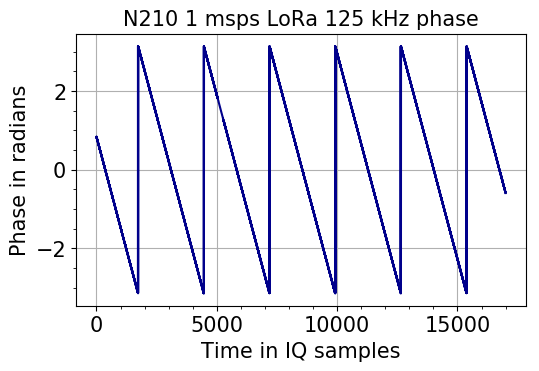

In [68]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(lora125_1msps_angle[0:len(lora125_1msps_angle)], color ='darkblue')
pyplot.plot(lora125_1msps_angle[10000:27000], color ='darkblue')
# pyplot.plot(lora125_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('N210 1 msps LoRa 125 kHz phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_phase_1msps_n210_20220324.png', format="png")
pyplot.show()

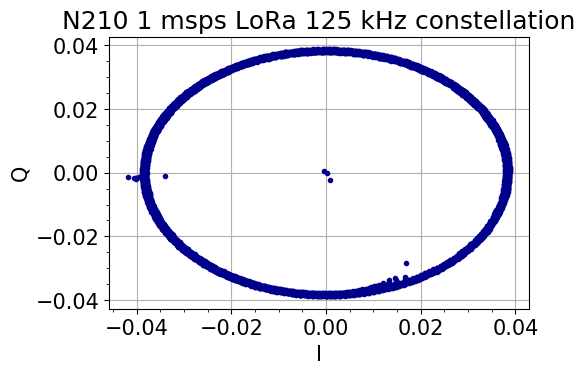

In [69]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r1 = lora125_1msps_complex[:5000]
r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r1), np.imag(r1), '.',color ='darkblue')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('N210 1 msps LoRa 125 kHz constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora_1msps_n210_constellation_202203234.png', format="png")
pyplot.show()

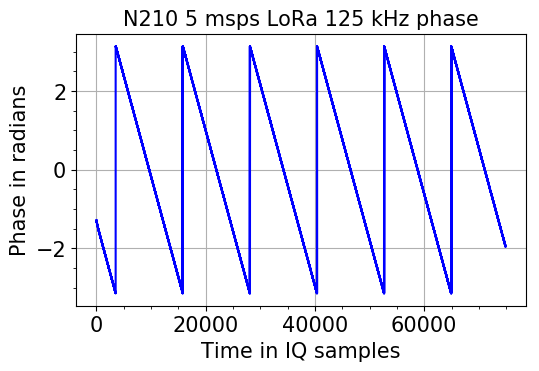

In [70]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(lora125_5msps_angle[100:len(lora125_5msps_angle)], color ='blue')
pyplot.plot(lora125_5msps_angle[100:75000], color ='blue')
# pyplot.plot(lora125_5msps_angle[1000:1100], color ='blue')
# pyplot.plot(lora125_5msps_angle[2999900:3000000], color ='blue')
# pyplot.plot(lora125_5msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('N210 5 msps LoRa 125 kHz phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_phase_5msps_n210_20220323.png', format="png")
pyplot.show()

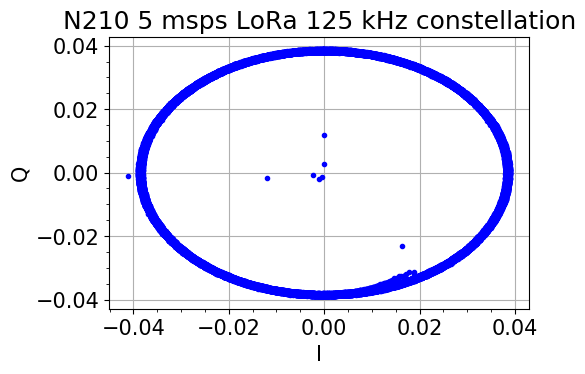

In [71]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r1 = lora125_5msps_complex[:100000]
r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r1), np.imag(r1), '.',color ='blue')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('N210 5 msps LoRa 125 kHz constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora_5msps_n210_constellation_20220324.png', format="png")
pyplot.show()

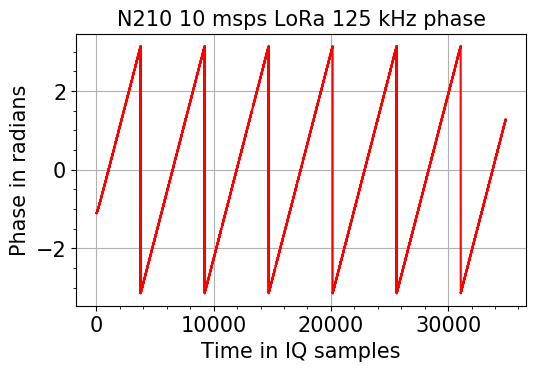

In [72]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(lora125_10msps_angle[100:len(lora125_10msps_angle)], color ='red')
pyplot.plot(lora125_10msps_angle[100:35000], color ='red')
# pyplot.plot(saw_1msps_angle[520:580], color ='red')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('N210 10 msps LoRa 125 kHz phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_phase_10msps_n210_20220324.png', format="png")
pyplot.show()

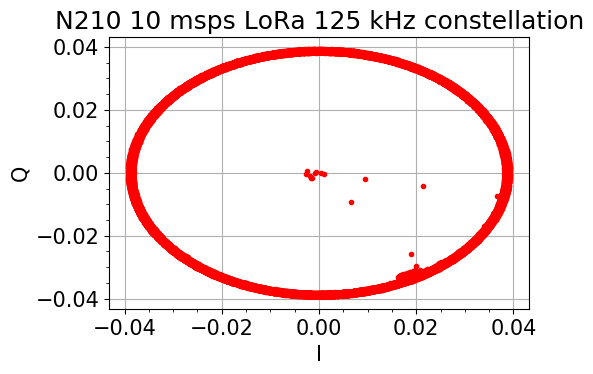

In [73]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r1 = lora125_10msps_complex[:200000]
r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r1), np.imag(r1), '.',color ='red')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('N210 10 msps LoRa 125 kHz constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora_10msps_n210_constellation_20220324.png', format="png")
pyplot.show()

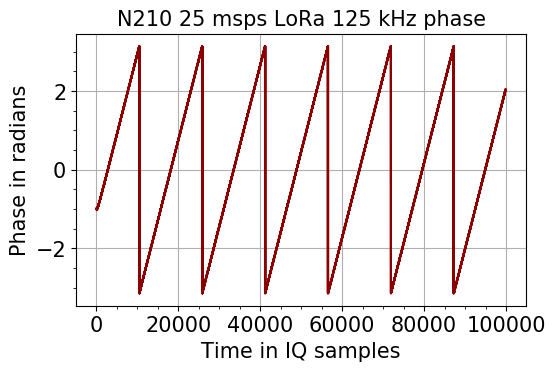

In [74]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(lora125_25msps_angle[10:100], color ='darkred')
# pyplot.plot(lora125_25msps_angle[10:len(lora125_25msps_angle)//100], color ='darkred')
pyplot.plot(lora125_25msps_angle[100:100000], color ='darkred')
# pyplot.plot(saw_25msps_10amp_angle[10:100], color ='darkblue')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('N210 25 msps LoRa 125 kHz phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_phase_25msps_n210_20220324.png', format="png")
pyplot.show()

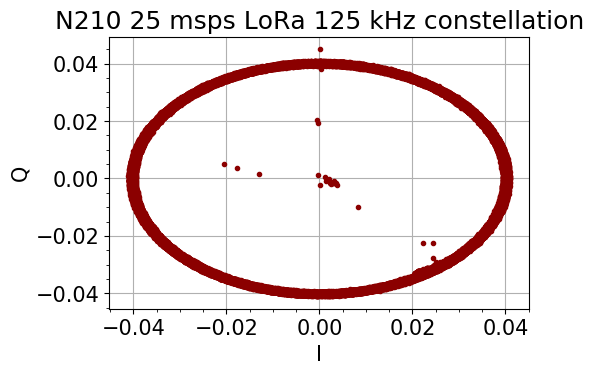

In [75]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r1 = lora125_25msps_complex[:200000]
r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r1), np.imag(r1), '.',color ='darkred')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('N210 25 msps LoRa 125 kHz constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora_25msps_n210_constellation_20220323.png', format="png")
pyplot.show()

In [52]:
def gpu_plot(db):
    I = db[0::2]
    Q = db[1::2]
    w = n_fft
    win = torch.hann_window(w, periodic=True, dtype=None, layout=torch.strided, requires_grad=False).cuda(GPU)
    I_stft = torch.stft(torch.tensor(I).cuda(GPU), n_fft=n_fft, hop_length=n_fft//2, win_length=w, window=win, center=True, normalized=True, onesided=False)
    Q_stft = torch.stft(torch.tensor(Q).cuda(GPU), n_fft=n_fft, hop_length=n_fft//2, win_length=w, window=win, center=True, normalized=True, onesided=False)
    X_stft = I_stft[...,0] + Q_stft[...,0] + I_stft[...,1] + -1*Q_stft[...,1]
    X_stft = torch.cat((X_stft[n_fft//2:],X_stft[:n_fft//2]))
    torch.cuda.empty_cache()
    return X_stft

#### scipy CPU stft function for reference

In [56]:
def cpu2(file, msps, n_fft):
#     t = len(db)
#     db2 = db[0::]
#     db = db.astype(np.float32).view(np.complex64)
    I_t, I_f, Z = signal.stft(file, fs=msps, nperseg=n_fft, return_onesided=False)
    Z = np.vstack([Z[n_fft//2:], Z[:n_fft//2]])
    return Z

### Plotting

In [53]:
msps_1 = 1e6
msps_5 = 5e6
msps_10 = 10e6
msps_25 = 25e6

In [54]:
fft_1msps = 1024
fft_5msps = 1024*5
fft_10msps = 1024*10
fft_25msps = 1024*25

In [57]:
lora125_1msps_stft = cpu2(lora125_1msps_complex, msps_1, fft_1msps)
lora125_5msps_stft = cpu2(lora125_5msps_complex, msps_5, fft_5msps)
lora125_10msps_stft = cpu2(lora125_10msps_complex, msps_10, fft_10msps)
lora125_25msps_stft = cpu2(lora125_25msps_complex, msps_25, fft_25msps)

In [58]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)

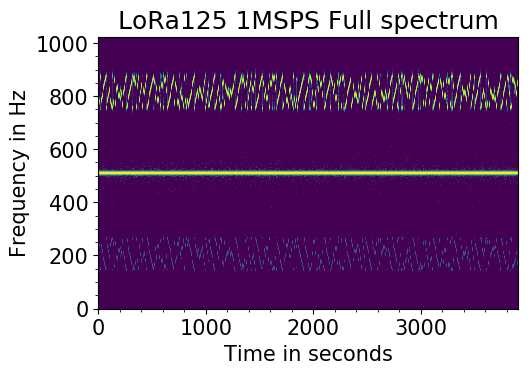

In [61]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
plt.imshow(20*np.log10(np.abs(lora125_1msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
plt.minorticks_on()
plt.title('LoRa125 1MSPS Full spectrum')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
# plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_1msps.png', format="png")
pyplot.show()


# # fig1 = plt.figure()
# fig2, ax = plt.subplots()
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft+eps)), aspect='auto', origin='lower')
# plt.imshow(20*np.log10(np.abs(lora125_1msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft[21660:21740,0:10]+eps)), aspect='auto', origin='lower')
# title = "LoRa125 1MSPS Full spectrum"
# # plt.title(title)
# plt.title('LoRa 125 kHz 1 MSPS')
# plt.xlabel('Time in seconds')
# plt.ylabel('Frequency in Hz')
# plt.minorticks_on()
# # fig1.savefig('LoRa125_full_spectrum.pdf', format="pdf")
# # plt.show()

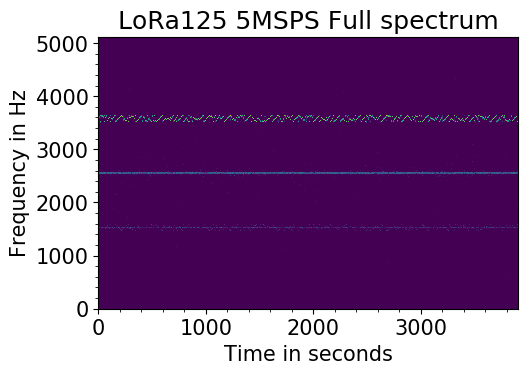

In [62]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
plt.imshow(20*np.log10(np.abs(lora125_5msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
plt.minorticks_on()
plt.title('LoRa125 5MSPS Full spectrum')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
# plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_5msps.png', format="png")
pyplot.show()


# fig1 = plt.figure()
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft+eps)), aspect='auto', origin='lower')
# plt.imshow(20*np.log10(np.abs(lora125_5msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft[21660:21740,0:10]+eps)), aspect='auto', origin='lower')
# title = "LoRa125 5MSPS Full spectrum"
# # plt.title(title)
# plt.xlabel('Time in seconds')
# plt.ylabel('Frequency in Hz')
# plt.minorticks_on()
# # fig1.savefig('LoRa125_full_spectrum.pdf', format="pdf")
# # plt.show()

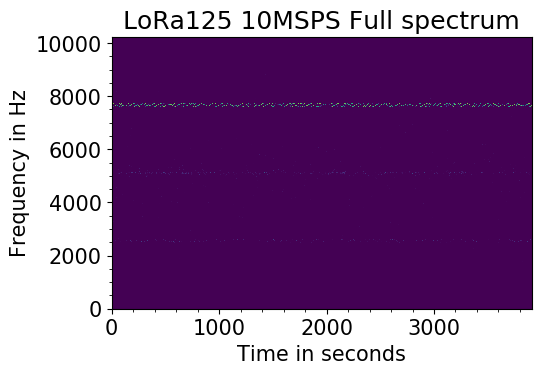

In [63]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
plt.imshow(20*np.log10(np.abs(lora125_10msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
plt.minorticks_on()
plt.title('LoRa125 10MSPS Full spectrum')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
# plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_10msps.png', format="png")
pyplot.show()


# fig1 = plt.figure()
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft+eps)), aspect='auto', origin='lower')
# plt.imshow(20*np.log10(np.abs(lora125_10msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft[21660:21740,0:10]+eps)), aspect='auto', origin='lower')
# title = "LoRa125 10MSPS Full spectrum"
# # plt.title(title)
# plt.xlabel('Time in seconds')
# plt.ylabel('Frequency in Hz')
# plt.minorticks_on()
# # fig1.savefig('LoRa125_full_spectrum.pdf', format="pdf")
# # plt.show()

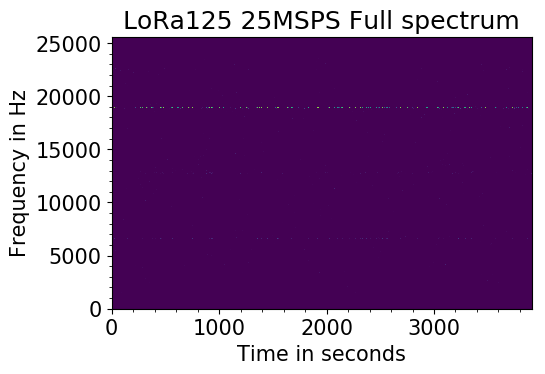

In [65]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
plt.imshow(20*np.log10(np.abs(lora125_25msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
plt.minorticks_on()
plt.title('LoRa125 25MSPS Full spectrum')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
# plt.grid(True)
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('lora125_25msps.png', format="png")
pyplot.show()


# fig1 = plt.figure()
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft+eps)), aspect='auto', origin='lower')
# plt.imshow(20*np.log10(np.abs(lora125_25msps_stft+eps)), vmin=-105, vmax=-75, aspect='auto', origin='lower')
# # plt.imshow(20*np.log10(np.abs(lora125_1msps_stft[21660:21740,0:10]+eps)), aspect='auto', origin='lower')
# title = "LoRa125 25MSPS Full spectrum"
# # plt.title(title)
# plt.xlabel('Time in seconds')
# plt.ylabel('Frequency in Hz')
# plt.minorticks_on()
# # fig1.savefig('LoRa125_full_spectrum.pdf', format="pdf")
# # plt.show()